In [1]:
import numpy as np
import pandas as pd

In [2]:
df_confirmed_cases = pd.read_csv("time_series_covid19_confirmed_US.csv")

df_deaths = pd.read_csv("time_series_covid19_deaths_US.csv")

df_vaccinations = pd.read_csv("us_state_vaccinations.csv")

In [3]:
# Calculate total cases and deaths for each province
total_cases_by_province = df_confirmed_cases.groupby('Province_State').sum().iloc[:, 11:].sum(axis=1)
total_deaths_by_province = df_deaths.groupby('Province_State').sum().iloc[:, 11:].sum(axis=1)

# Create a DataFrame to store the results
df_total_cases_deaths_by_province = pd.DataFrame({'Total_Cases': total_cases_by_province, 'Total_Deaths': total_deaths_by_province})

# Reset index to make 'Province_State' a column
df_total_cases_deaths_by_province.reset_index(inplace=True)

# Display the resulting DataFrame
print(df_total_cases_deaths_by_province)


              Province_State  Total_Cases  Total_Deaths
0                    Alabama    872756073      13398261
1                     Alaska    153011898        751555
2             American Samoa      2608837         10804
3                    Arizona   1330372436      20789702
4                   Arkansas    549955573       7721989
5                 California   6166190335      65490302
6                   Colorado    922394521       8942186
7                Connecticut    507631287       8911110
8                   Delaware    171886464       2089142
9           Diamond Princess        53306             0
10      District of Columbia     90279276       1140001
11                   Florida   3978357707      51475342
12                   Georgia   1698658727      26228841
13            Grand Princess       111231          3209
14                      Guam     27172745        232819
15                    Hawaii    153864444        922359
16                     Idaho    292218765       

In [4]:
#1

In [19]:
import ipywidgets as widgets
from IPython.display import display
import folium

# Get minimum and maximum latitude and longitude values from the dataset
min_lat_value = df_confirmed_cases['Lat'].min()
max_lat_value = df_confirmed_cases['Lat'].max()
min_long_value = df_confirmed_cases['Long_'].min()
max_long_value = df_confirmed_cases['Long_'].max()

# Function to calculate total cases within the specified latitude and longitude range and display heatmap
def calculate_total_cases_within_range(min_lat, max_lat, min_long, max_long):
    # Filter DataFrame based on latitude and longitude range
    filtered_df = df_confirmed_cases[(df_confirmed_cases['Lat'] >= min_lat) & (df_confirmed_cases['Lat'] <= max_lat) & 
                                     (df_confirmed_cases['Long_'] >= min_long) & (df_confirmed_cases['Long_'] <= max_long)]
    
    # Calculate total cases for each province within the filtered range
    total_cases_by_province = filtered_df.groupby('Province_State').sum().iloc[:, 11:].sum(axis=1)
    
    # Create a DataFrame to store the results
    df_total_cases_within_range = pd.DataFrame({'Province_State': total_cases_by_province.index, 'Total_Cases': total_cases_by_province})
    
    # Create map centered at the average latitude and longitude
    map_center = [(min_lat + max_lat) / 2, (min_long + max_long) / 2]
    m = folium.Map(location=map_center, zoom_start=5)

    # Add heatmap layer to the map
    heat_data = [[row['Lat'], row['Long_']] for idx, row in filtered_df.iterrows()]
    folium.plugins.HeatMap(heat_data).add_to(m)

    # Display the map
    display(m)

# Define sliders for latitude and longitude range
min_lat_slider = widgets.FloatSlider(value=min_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Min Latitude:')
max_lat_slider = widgets.FloatSlider(value=max_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Max Latitude:')
min_long_slider = widgets.FloatSlider(value=min_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Min Longitude:')
max_long_slider = widgets.FloatSlider(value=max_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Max Longitude:')

# Create a button to trigger the calculation
calculate_button = widgets.Button(description='Calculate Heatmap')

# Define function to handle button click event
def on_button_click(b):
    calculate_total_cases_within_range(min_lat_slider.value, max_lat_slider.value, min_long_slider.value, max_long_slider.value)

# Attach button click event handler
calculate_button.on_click(on_button_click)

# Display the sliders and button
display(min_lat_slider, max_lat_slider, min_long_slider, max_long_slider, calculate_button)


FloatSlider(value=-14.271, description='Min Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=69.31479216, description='Max Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=-174.1596, description='Min Longitude:', max=145.6739, min=-174.1596)

FloatSlider(value=145.6739, description='Max Longitude:', max=145.6739, min=-174.1596)

Button(description='Calculate Heatmap', style=ButtonStyle())

In [17]:
import ipywidgets as widgets
from IPython.display import display

# Get minimum and maximum latitude and longitude values from the dataset
min_lat_value = df_confirmed_cases['Lat'].min()
max_lat_value = df_confirmed_cases['Lat'].max()
min_long_value = df_confirmed_cases['Long_'].min()
max_long_value = df_confirmed_cases['Long_'].max()

# Function to calculate total cases within the specified latitude and longitude range
def calculate_total_cases_within_range(min_lat, max_lat, min_long, max_long):
    # Filter DataFrame based on latitude and longitude range
    filtered_df = df_confirmed_cases[(df_confirmed_cases['Lat'] >= min_lat) & (df_confirmed_cases['Lat'] <= max_lat) & 
                                     (df_confirmed_cases['Long_'] >= min_long) & (df_confirmed_cases['Long_'] <= max_long)]
    
    # Calculate total cases for each province within the filtered range
    total_cases_by_province = filtered_df.groupby('Province_State').sum().iloc[:, 11:].sum(axis=1)
    
    # Create a DataFrame to store the results
    df_total_cases_within_range = pd.DataFrame({'Province_State': total_cases_by_province.index, 'Total_Cases': total_cases_by_province})
    
    # Reset index to make 'Province_State' a column
    df_total_cases_within_range.reset_index(drop=True, inplace=True)
    
    # Display the resulting DataFrame
    display(df_total_cases_within_range)

# Define sliders for latitude and longitude range
min_lat_slider = widgets.FloatSlider(value=min_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Min Latitude:')
max_lat_slider = widgets.FloatSlider(value=max_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Max Latitude:')
min_long_slider = widgets.FloatSlider(value=min_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Min Longitude:')
max_long_slider = widgets.FloatSlider(value=max_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Max Longitude:')

# Create a button to trigger the calculation
calculate_button = widgets.Button(description='Calculate Total Cases')

# Define function to handle button click event
def on_button_click(b):
    calculate_total_cases_within_range(min_lat_slider.value, max_lat_slider.value, min_long_slider.value, max_long_slider.value)

# Attach button click event handler
calculate_button.on_click(on_button_click)

# Display the sliders and button
display(min_lat_slider, max_lat_slider, min_long_slider, max_long_slider, calculate_button)



FloatSlider(value=-14.271, description='Min Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=69.31479216, description='Max Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=-174.1596, description='Min Longitude:', max=145.6739, min=-174.1596)

FloatSlider(value=145.6739, description='Max Longitude:', max=145.6739, min=-174.1596)

Button(description='Calculate Total Cases', style=ButtonStyle())

,Province_State,Total_Cases
0,Alabama,872756073
1,Alaska,153011898
2,American Samoa,2608837
3,Arizona,1330372436
4,Arkansas,549955573
5,California,6166190335
6,Colorado,922394521
7,Connecticut,507631287
8,Delaware,171886464
9,Diamond Princess,53306


In [7]:
# Heatmap for total cases

import folium
from folium.plugins import HeatMap
import ipywidgets as widgets
from IPython.display import display

# Get minimum and maximum latitude and longitude values from the dataset
min_lat_value = df_confirmed_cases['Lat'].min()
max_lat_value = df_confirmed_cases['Lat'].max()
min_long_value = df_confirmed_cases['Long_'].min()
max_long_value = df_confirmed_cases['Long_'].max()

# Function to calculate total cases within the specified latitude and longitude range
def calculate_total_cases_within_range(min_lat, max_lat, min_long, max_long):
    # Filter DataFrame based on latitude and longitude range
    filtered_df = df_confirmed_cases[(df_confirmed_cases['Lat'] >= min_lat) & (df_confirmed_cases['Lat'] <= max_lat) & 
                                     (df_confirmed_cases['Long_'] >= min_long) & (df_confirmed_cases['Long_'] <= max_long)]
    
    # Drop rows with NaN values in latitude and longitude columns
    filtered_df = filtered_df.dropna(subset=['Lat', 'Long_'])
    
    # Check if there are any rows left after dropping NaN values
    if filtered_df.empty:
        print("No data available for the selected range.")
        return
    
    # Create a heatmap
    heatmap_data = filtered_df[['Lat', 'Long_']]
    m = folium.Map(location=[min_lat, min_long], zoom_start=5)
    HeatMap(data=heatmap_data, radius=10).add_to(m)
    
    # Display the map
    display(m)

# Define sliders for latitude and longitude range
min_lat_slider = widgets.FloatSlider(value=min_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Min Latitude:')
max_lat_slider = widgets.FloatSlider(value=max_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Max Latitude:')
min_long_slider = widgets.FloatSlider(value=min_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Min Longitude:')
max_long_slider = widgets.FloatSlider(value=max_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Max Longitude:')

# Create a button to trigger the calculation
calculate_button = widgets.Button(description='Generate Heatmap')

# Define function to handle button click event
def on_button_click(b):
    calculate_total_cases_within_range(min_lat_slider.value, max_lat_slider.value, min_long_slider.value, max_long_slider.value)

# Attach button click event handler
calculate_button.on_click(on_button_click)

# Display the sliders and button
display(min_lat_slider, max_lat_slider, min_long_slider, max_long_slider, calculate_button)


FloatSlider(value=-14.271, description='Min Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=69.31479216, description='Max Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=-174.1596, description='Min Longitude:', max=145.6739, min=-174.1596)

FloatSlider(value=145.6739, description='Max Longitude:', max=145.6739, min=-174.1596)

Button(description='Generate Heatmap', style=ButtonStyle())

In [8]:
## HeatMap for deaths

import folium
from folium.plugins import HeatMap
import ipywidgets as widgets
from IPython.display import display

# Get minimum and maximum latitude and longitude values from the dataset
min_lat_value = df_deaths['Lat'].min()
max_lat_value = df_deaths['Lat'].max()
min_long_value = df_deaths['Long_'].min()
max_long_value = df_deaths['Long_'].max()

# Function to calculate total deaths within the specified latitude and longitude range
def calculate_total_deaths_within_range(min_lat, max_lat, min_long, max_long):
    # Filter DataFrame based on latitude and longitude range
    filtered_df = df_deaths[(df_deaths['Lat'] >= min_lat) & (df_deaths['Lat'] <= max_lat) & 
                            (df_deaths['Long_'] >= min_long) & (df_deaths['Long_'] <= max_long)]
    
    # Drop rows with NaN values in latitude and longitude columns
    filtered_df = filtered_df.dropna(subset=['Lat', 'Long_'])
    
    # Check if there are any rows left after dropping NaN values
    if filtered_df.empty:
        print("No data available for the selected range.")
        return
    
    # Create a heatmap
    heatmap_data = filtered_df[['Lat', 'Long_']]
    m = folium.Map(location=[min_lat, min_long], zoom_start=5)
    HeatMap(data=heatmap_data, radius=10).add_to(m)
    
    # Display the map
    display(m)

# Define sliders for latitude and longitude range
min_lat_slider = widgets.FloatSlider(value=min_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Min Latitude:')
max_lat_slider = widgets.FloatSlider(value=max_lat_value, min=min_lat_value, max=max_lat_value, step=0.1, description='Max Latitude:')
min_long_slider = widgets.FloatSlider(value=min_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Min Longitude:')
max_long_slider = widgets.FloatSlider(value=max_long_value, min=min_long_value, max=max_long_value, step=0.1, description='Max Longitude:')

# Create a button to trigger the calculation
calculate_button = widgets.Button(description='Generate Death Heatmap')

# Define function to handle button click event
def on_button_click(b):
    calculate_total_deaths_within_range(min_lat_slider.value, max_lat_slider.value, min_long_slider.value, max_long_slider.value)

# Attach button click event handler
calculate_button.on_click(on_button_click)

# Display the sliders and button
display(min_lat_slider, max_lat_slider, min_long_slider, max_long_slider, calculate_button)


FloatSlider(value=-14.271, description='Min Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=69.31479216, description='Max Latitude:', max=69.31479216, min=-14.271)

FloatSlider(value=-174.1596, description='Min Longitude:', max=145.6739, min=-174.1596)

FloatSlider(value=145.6739, description='Max Longitude:', max=145.6739, min=-174.1596)

Button(description='Generate Death Heatmap', style=ButtonStyle())

In [9]:
#### Visualization 2

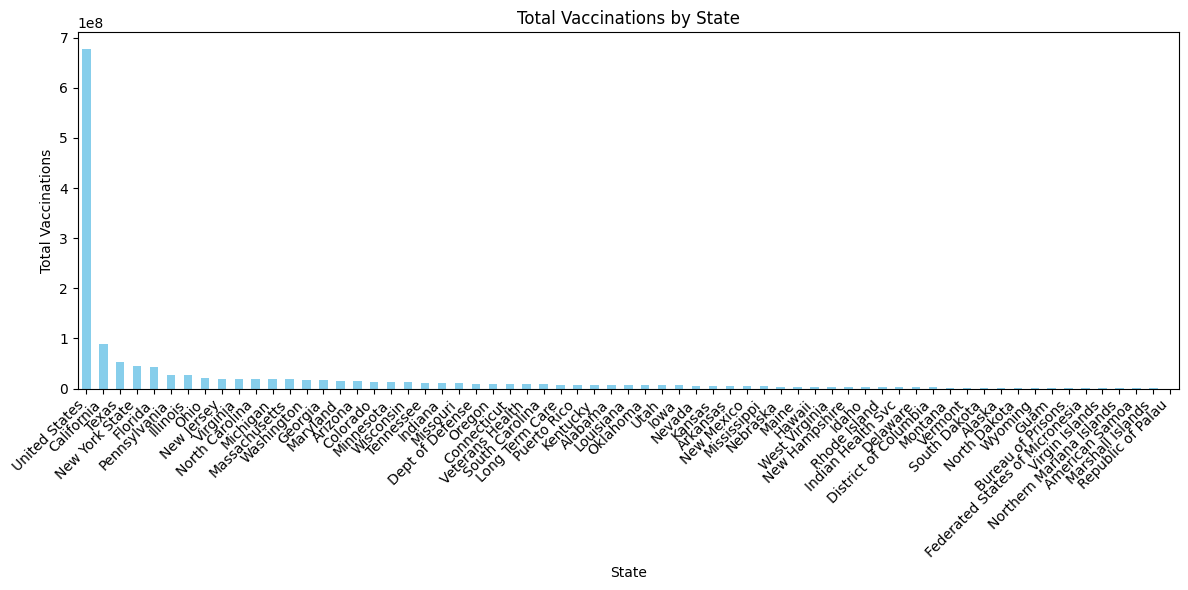

In [10]:
import matplotlib.pyplot as plt

# Aggregate total vaccinations by state
vaccinations_by_state = df_vaccinations.groupby('location')['total_vaccinations'].max().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
vaccinations_by_state.plot(kind='bar', color='skyblue')
plt.title('Total Vaccinations by State')
plt.xlabel('State')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:
## here refer to the HTML file which is created

##TRY IF YOU CAN DISPLAY IT IN THE IBYNB FILE AS WELL

import plotly.express as px
import plotly.io as pio

# Aggregate total vaccinations by state
vaccinations_by_state = df_vaccinations.groupby('location')['total_vaccinations'].max().sort_values(ascending=False).reset_index()

# Plotting the bar plot
fig = px.bar(vaccinations_by_state, x='location', y='total_vaccinations', color='total_vaccinations', 
             labels={'location': 'State', 'total_vaccinations': 'Total Vaccinations'}, 
             title='Total Vaccinations by State')
fig.update_layout(xaxis_tickangle=-45)

# Save the figure to an HTML file
pio.write_html(fig, 'total_vaccinations_bar_plot.html')




In [12]:
## Visualization 3


In [1]:
## TOTAL OF EVERYTHING
import pandas as pd

# Load datasets
df_vaccinations = pd.read_csv("us_state_vaccinations.csv")


# Function to calculate total vaccinations by location
def calculate_total_vaccinations():
    # Ensure 'location' column exists and convert total_vaccinations to numeric
    if 'location' in df_vaccinations.columns:
        df_vaccinations['total_vaccinations'] = pd.to_numeric(df_vaccinations['total_vaccinations'], errors='coerce')
        total_vaccinations_by_location = df_vaccinations.groupby('location')['total_vaccinations'].sum()
        return total_vaccinations_by_location
    else:
        print("Error: 'location' column not found in vaccinations DataFrame.")
        return None

# Function to calculate totals for additional columns
def calculate_total_columns():
    # List of columns to calculate totals for
    columns_to_sum = ['total_distributed', 'people_vaccinated', 'people_fully_vaccinated_per_hundred',
                      'total_vaccinations_per_hundred', 'people_fully_vaccinated', 'people_vaccinated_per_hundred',
                      'distributed_per_hundred', 'daily_vaccinations_raw', 'daily_vaccinations',
                      'daily_vaccinations_per_million', 'share_doses_used', 'total_boosters',
                      'total_boosters_per_hundred']
    
    # Convert selected columns to numeric and calculate totals
    for col in columns_to_sum:
        if col in df_vaccinations.columns:
            df_vaccinations[col] = pd.to_numeric(df_vaccinations[col], errors='coerce')
    
    # Group by location and sum the selected columns
    total_columns_by_location = df_vaccinations.groupby('location')[columns_to_sum].sum()
    return total_columns_by_location

#total vaccinations
total_vaccinations = calculate_total_vaccinations()

# Calculate totals for additional columns
total_additional_columns = calculate_total_columns()

# Combine the results into a single DataFrame if total_vaccinations is not None
if total_vaccinations is not None:
    total_vaccinations.fillna(0, inplace=True)
    print("\nTotal Vaccinations:")
    print(total_vaccinations)
    print("\nTotal for Additional Columns:")
    print(total_additional_columns)
else:
    print("Error: Unable to calculate total vaccinations.")



Total Vaccinations:
location
Alabama           2.303897e+09
Alaska            3.964053e+08
American Samoa    3.488869e+07
Arizona           4.390960e+09
Arkansas          1.569412e+09
                      ...     
Virginia          5.862231e+09
Washington        4.875851e+09
West Virginia     9.240334e+08
Wisconsin         3.805771e+09
Wyoming           2.337945e+08
Name: total_vaccinations, Length: 65, dtype: float64

Total for Additional Columns:
                total_distributed  people_vaccinated  \
location                                               
Alabama              3.533010e+09       1.219792e+09   
Alaska               5.404471e+08       1.943539e+08   
American Samoa       3.945678e+07       1.703688e+07   
Arizona              5.455063e+09       2.119476e+09   
Arkansas             2.238898e+09       8.085606e+08   
...                           ...                ...   
Virginia             7.040421e+09       2.859762e+09   
Washington           6.002446e+09       2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Load datasets
df_vaccinations = pd.read_csv("us_state_vaccinations.csv")

# Function to calculate total vaccinations by location
def calculate_total_vaccinations():
    # Ensure 'location' column exists and convert total_vaccinations to numeric
    if 'location' in df_vaccinations.columns:
        df_vaccinations['total_vaccinations'] = pd.to_numeric(df_vaccinations['total_vaccinations'], errors='coerce')
        total_vaccinations_by_location = df_vaccinations.groupby('location')['total_vaccinations'].sum()
        return total_vaccinations_by_location
    else:
        print("Error: 'location' column not found in vaccinations DataFrame.")
        return None

# Function to calculate totals for additional columns
def calculate_total_columns():
    # List of columns to calculate totals for
    columns_to_sum = ['total_distributed', 'people_vaccinated', 'people_fully_vaccinated_per_hundred',
                      'total_vaccinations_per_hundred', 'people_fully_vaccinated', 'people_vaccinated_per_hundred',
                      'distributed_per_hundred', 'daily_vaccinations_raw', 'daily_vaccinations',
                      'daily_vaccinations_per_million', 'share_doses_used', 'total_boosters',
                      'total_boosters_per_hundred']
    
    # Convert selected columns to numeric and calculate totals
    for col in columns_to_sum:
        if col in df_vaccinations.columns:
            df_vaccinations[col] = pd.to_numeric(df_vaccinations[col], errors='coerce')
    
    # Group by location and sum the selected columns
    total_columns_by_location = df_vaccinations.groupby('location')[columns_to_sum].sum()
    return total_columns_by_location

# Create dropdown widget for attribute selection
attribute_dropdown = widgets.SelectMultiple(
    options=df_vaccinations.columns,
    value=['total_vaccinations'],  # Default value
    description='Attributes:'
)

# Create dropdown widget for state selection
state_dropdown = widgets.SelectMultiple(
    options=df_vaccinations['location'].unique(),
    value=['Alabama', 'Alaska'],  # Default value
    description='States:'
)

# Define interactive function to update plots based on dropdown selection
@interact(attributes=attribute_dropdown, states=state_dropdown)
def update_plots(attributes, states):
    # Ensure attributes is always a list
    attributes = list(attributes)
    
    # Filter DataFrame based on selected states
    filtered_df = df_vaccinations[df_vaccinations['location'].isin(states)]
    
    # Calculate totals for selected columns
    total_additional_columns = calculate_total_columns()
    
    # Combine the results into a single DataFrame if total_vaccinations is not None
    if total_additional_columns is not None:
        # Visualize totals for selected columns
        plt.figure(figsize=(14, 8))  # Increase figure size
        filtered_df.groupby('location')[attributes].sum().plot(kind='bar', stacked=True)
        plt.title('Totals for Selected Columns by Location')
        plt.xlabel('Location')
        plt.ylabel('Total')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.legend(title='Column', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend placement
        plt.tight_layout()
        plt.show()
    else:
        print("Error: Unable to calculate total columns.")


interactive(children=(SelectMultiple(description='Attributes:', index=(2,), options=('date', 'location', 'tota…